In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
bank = pd.read_csv("../Logistic Regression/bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank = bank.rename(columns={'Target': 'y'})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:

bank["job"] = bank["job"].astype('category')
bank["job"] = bank["job"].cat.codes

bank["marital"] = bank["marital"].astype('category')
bank["marital"] = bank["marital"].cat.codes

bank["education"] = bank["education"].astype('category')
bank["education"] = bank["education"].cat.codes

bank["default"] = bank["default"].astype('category')
bank["default"] = bank["default"].cat.codes

bank["housing"] = bank["housing"].astype('category')
bank["housing"] = bank["housing"].cat.codes

bank["loan"] = bank["loan"].astype('category')
bank["loan"] = bank["loan"].cat.codes

bank["contact"] = bank["contact"].astype('category')
bank["contact"] = bank["contact"].cat.codes

bank["month"] = bank["month"].astype('category')
bank["month"] = bank["month"].cat.codes

bank["poutcome"] = bank["poutcome"].astype('category')
bank["poutcome"] = bank["poutcome"].cat.codes

bank["y"] = bank["y"].astype('category')
bank["y"] = bank["y"].cat.codes

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [7]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
y            45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

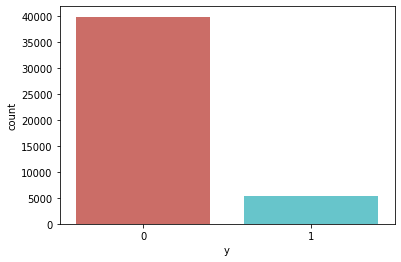

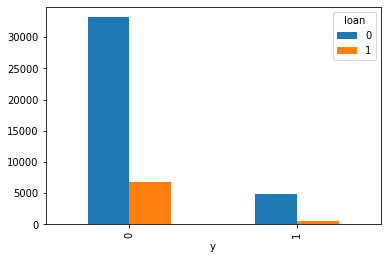

In [12]:
# Getting the barplot for the categorical columns 

sns.countplot(x="y",data=bank,palette="hls")
pd.crosstab(bank.y,bank.loan).plot(kind="bar")
plt.show()


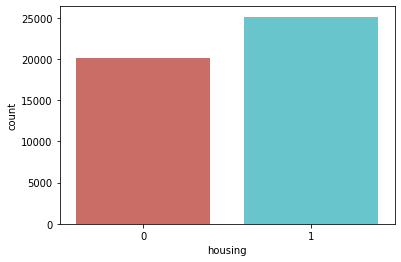

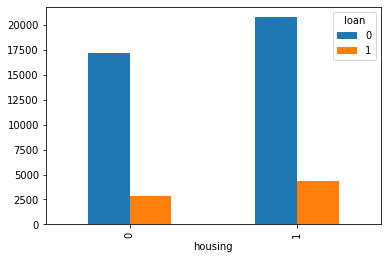

In [11]:
sns.countplot(x="housing",data=bank,palette="hls")
pd.crosstab(bank.housing,bank.loan).plot(kind="bar")
plt.show()

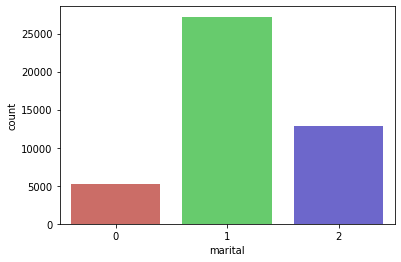

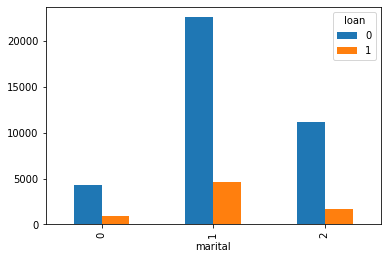

In [13]:
sns.countplot(x="marital",data=bank,palette="hls")
pd.crosstab(bank.marital,bank.loan).plot(kind="bar")
plt.show()

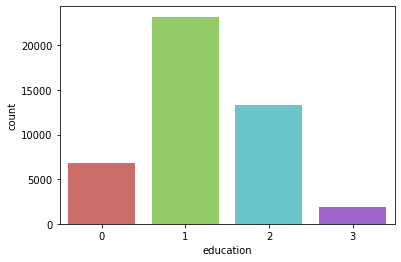

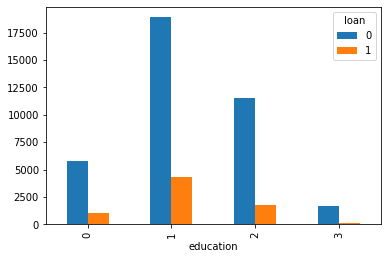

In [14]:
sns.countplot(x="education",data=bank,palette="hls")
pd.crosstab(bank.education,bank.loan).plot(kind="bar")
plt.show()

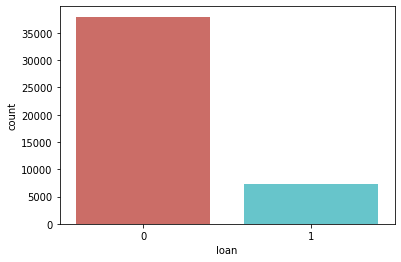

In [19]:
sns.countplot(x="loan",data=bank,palette="hls")
plt.show()

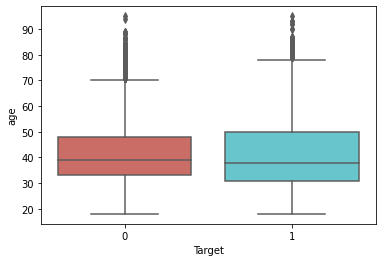

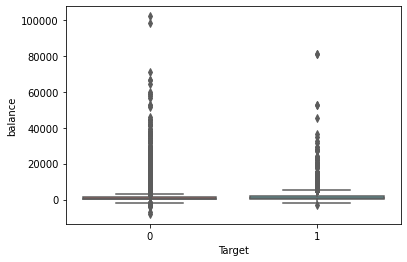

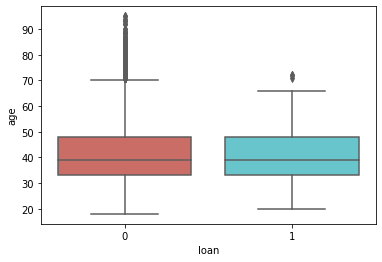

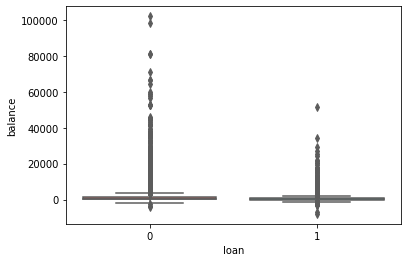

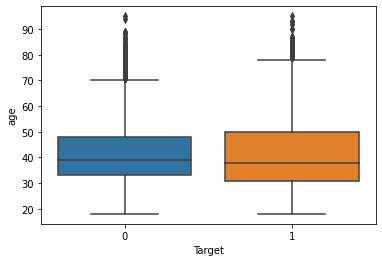

In [22]:
# Data Distribution - Boxplot of continuous variables wrt to category of categorical columns

sns.boxplot(x="Target",y="age",data=bank,palette="hls")
plt.show()
sns.boxplot(x="Target",y="balance",data=bank,palette="hls")
plt.show()
sns.boxplot(x="loan",y="age",data=bank,palette="hls")
plt.show()
sns.boxplot(x="loan",y="balance",data=bank,palette="hls")
plt.show()
sns.boxplot(x="Target",y='age',data= bank) ## X has to be catagorical or Discreat
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
X = bank.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = bank.iloc[:,[16]]

classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_    # coefficients of features 
classifier.predict_proba (X)       # Probability values

C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.96713907, 0.03286093],
       [0.9802648 , 0.0197352 ],
       [0.99448691, 0.00551309],
       ...,
       [0.08441039, 0.91558961],
       [0.8041932 , 0.1958068 ],
       [0.4871489 , 0.5128511 ]])

In [16]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0,1


In [18]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
y_prob.head()

,0,1
0,0.967139,0.032861
1,0.980265,0.019735
2,0.994487,0.005513
3,0.980989,0.019011
4,0.912385,0.087615


In [20]:
new_df = pd.concat([bank,y_prob],axis=1).sort_index()
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.967139,0.032861
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.980265,0.019735
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.994487,0.005513
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.980989,0.019011
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.912385,0.087615


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39142,   780],
       [ 4157,  1132]], dtype=int64)

In [22]:
print(classification_report(Y,y_pred))   # Calculates precision, recall, f1 score, support
             

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [29]:
print('Accuracy: ',metrics.accuracy_score(Y, y_pred))  # Accuracy

Accuracy:  0.8908009112826525


In [ ]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(bank.y, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
plt.show()
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
print(roc_auc)